In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np

In [3]:
import sklearn

In [4]:
pd.set_option('display.max_column', 400)
pd.set_option('display.max_rows', 100)

In [5]:
df_train_transaction= pd.read_csv("train_transaction.csv")
df_test_transaction = pd.read_csv("test_transaction.csv")

In [6]:
df_test_identity = pd.read_csv('test_identity.csv')
df_train_identity = pd.read_csv('train_identity.csv')

In [7]:
df_train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [8]:
df_train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [4]:
#df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [9]:
print(df_train_transaction.shape)
print(df_test_transaction.shape)
print(df_train_identity.shape)
print(df_test_identity.shape)


(590540, 394)
(506691, 393)
(144233, 41)
(141907, 41)


# merging Data i.e. identity and transaction

In [10]:

df_train = pd.merge(df_train_transaction, df_train_identity, on='TransactionID', how='left')
df_test = pd.merge(df_test_transaction, df_test_identity, on='TransactionID', how='left')

In [11]:
print(df_train.shape)
print(df_test.shape)

(590540, 434)
(506691, 433)


In [12]:
df_train_transaction['TransactionDT'].shape[0] , df_train_transaction['TransactionDT'].nunique()

(590540, 573349)

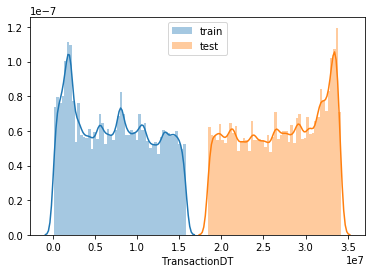

In [13]:
sns.distplot(df_train['TransactionDT'])
sns.distplot(df_test['TransactionDT'])
plt.legend(['train','test'])

In [14]:
for i in df_train.columns:
    print(i,'NaN values present is:',df_train[i].isnull().sum(),end=" ")
    print('type is :',df_train[i].dtypes,end=" ")
    print('% of NaN values:',np.round(df_train[i].isnull().sum()/df_train.shape[0]*100,2))

TransactionID NaN values present is: 0 type is : int64 % of NaN values: 0.0
isFraud NaN values present is: 0 type is : int64 % of NaN values: 0.0
TransactionDT NaN values present is: 0 type is : int64 % of NaN values: 0.0
TransactionAmt NaN values present is: 0 type is : float64 % of NaN values: 0.0
ProductCD NaN values present is: 0 type is : object % of NaN values: 0.0
card1 NaN values present is: 0 type is : int64 % of NaN values: 0.0
card2 NaN values present is: 8933 type is : float64 % of NaN values: 1.51
card3 NaN values present is: 1565 type is : float64 % of NaN values: 0.27
card4 NaN values present is: 1577 type is : object % of NaN values: 0.27
card5 NaN values present is: 4259 type is : float64 % of NaN values: 0.72
card6 NaN values present is: 1571 type is : object % of NaN values: 0.27
addr1 NaN values present is: 65706 type is : float64 % of NaN values: 11.13
addr2 NaN values present is: 65706 type is : float64 % of NaN values: 11.13
dist1 NaN values present is: 352271 ty

V105 NaN values present is: 314 type is : float64 % of NaN values: 0.05
V106 NaN values present is: 314 type is : float64 % of NaN values: 0.05
V107 NaN values present is: 314 type is : float64 % of NaN values: 0.05
V108 NaN values present is: 314 type is : float64 % of NaN values: 0.05
V109 NaN values present is: 314 type is : float64 % of NaN values: 0.05
V110 NaN values present is: 314 type is : float64 % of NaN values: 0.05
V111 NaN values present is: 314 type is : float64 % of NaN values: 0.05
V112 NaN values present is: 314 type is : float64 % of NaN values: 0.05
V113 NaN values present is: 314 type is : float64 % of NaN values: 0.05
V114 NaN values present is: 314 type is : float64 % of NaN values: 0.05
V115 NaN values present is: 314 type is : float64 % of NaN values: 0.05
V116 NaN values present is: 314 type is : float64 % of NaN values: 0.05
V117 NaN values present is: 314 type is : float64 % of NaN values: 0.05
V118 NaN values present is: 314 type is : float64 % of NaN value

V258 NaN values present is: 460110 type is : float64 % of NaN values: 77.91
V259 NaN values present is: 449124 type is : float64 % of NaN values: 76.05
V260 NaN values present is: 460110 type is : float64 % of NaN values: 77.91
V261 NaN values present is: 460110 type is : float64 % of NaN values: 77.91
V262 NaN values present is: 460110 type is : float64 % of NaN values: 77.91
V263 NaN values present is: 460110 type is : float64 % of NaN values: 77.91
V264 NaN values present is: 460110 type is : float64 % of NaN values: 77.91
V265 NaN values present is: 460110 type is : float64 % of NaN values: 77.91
V266 NaN values present is: 460110 type is : float64 % of NaN values: 77.91
V267 NaN values present is: 460110 type is : float64 % of NaN values: 77.91
V268 NaN values present is: 460110 type is : float64 % of NaN values: 77.91
V269 NaN values present is: 460110 type is : float64 % of NaN values: 77.91
V270 NaN values present is: 449124 type is : float64 % of NaN values: 76.05
V271 NaN val

id_34 NaN values present is: 512735 type is : object % of NaN values: 86.82
id_35 NaN values present is: 449555 type is : object % of NaN values: 76.13
id_36 NaN values present is: 449555 type is : object % of NaN values: 76.13
id_37 NaN values present is: 449555 type is : object % of NaN values: 76.13
id_38 NaN values present is: 449555 type is : object % of NaN values: 76.13
DeviceType NaN values present is: 449730 type is : object % of NaN values: 76.16
DeviceInfo NaN values present is: 471874 type is : object % of NaN values: 79.91


In [15]:
for i in df_train.columns:
    print(i,' ',df_train[i].isnull().sum(),end=" ")
    #print('type is :',df_train[i].dtypes,end=" ")
    print('%',np.round(df_train[i].isnull().sum()/df_train.shape[0]*100,2))

TransactionID   0 % 0.0
isFraud   0 % 0.0
TransactionDT   0 % 0.0
TransactionAmt   0 % 0.0
ProductCD   0 % 0.0
card1   0 % 0.0
card2   8933 % 1.51
card3   1565 % 0.27
card4   1577 % 0.27
card5   4259 % 0.72
card6   1571 % 0.27
addr1   65706 % 11.13
addr2   65706 % 11.13
dist1   352271 % 59.65
dist2   552913 % 93.63
P_emaildomain   94456 % 15.99
R_emaildomain   453249 % 76.75
C1   0 % 0.0
C2   0 % 0.0
C3   0 % 0.0
C4   0 % 0.0
C5   0 % 0.0
C6   0 % 0.0
C7   0 % 0.0
C8   0 % 0.0
C9   0 % 0.0
C10   0 % 0.0
C11   0 % 0.0
C12   0 % 0.0
C13   0 % 0.0
C14   0 % 0.0
D1   1269 % 0.21
D2   280797 % 47.55
D3   262878 % 44.51
D4   168922 % 28.6
D5   309841 % 52.47
D6   517353 % 87.61
D7   551623 % 93.41
D8   515614 % 87.31
D9   515614 % 87.31
D10   76022 % 12.87
D11   279287 % 47.29
D12   525823 % 89.04
D13   528588 % 89.51
D14   528353 % 89.47
D15   89113 % 15.09
M1   271100 % 45.91
M2   271100 % 45.91
M3   271100 % 45.91
M4   281444 % 47.66
M5   350482 % 59.35
M6   169360 % 28.68
M7   346265 % 5

id_16   461200 % 78.1
id_17   451171 % 76.4
id_18   545427 % 92.36
id_19   451222 % 76.41
id_20   451279 % 76.42
id_21   585381 % 99.13
id_22   585371 % 99.12
id_23   585371 % 99.12
id_24   585793 % 99.2
id_25   585408 % 99.13
id_26   585377 % 99.13
id_27   585371 % 99.12
id_28   449562 % 76.13
id_29   449562 % 76.13
id_30   512975 % 86.87
id_31   450258 % 76.25
id_32   512954 % 86.86
id_33   517251 % 87.59
id_34   512735 % 86.82
id_35   449555 % 76.13
id_36   449555 % 76.13
id_37   449555 % 76.13
id_38   449555 % 76.13
DeviceType   449730 % 76.16
DeviceInfo   471874 % 79.91


Text(0, 0.5, 'Transaction Count')

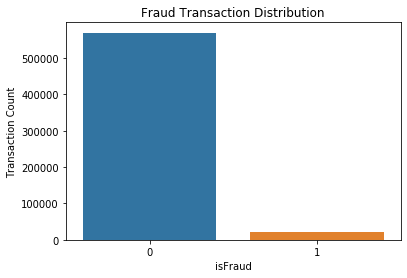

In [16]:
plt.figure()
plt.title('Fraud Transaction Distribution')
ax=sns.countplot(x='isFraud', data =df_train_transaction)
plt.ylabel("Transaction Count")

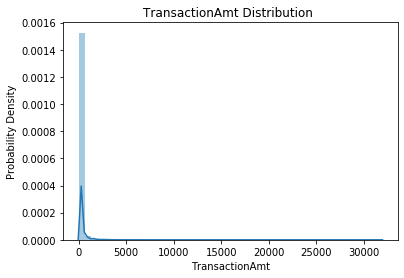

In [17]:
plt.figure()
sns.distplot(df_train_transaction['TransactionAmt'])
plt.title("TransactionAmt Distribution ")
plt.ylabel("Probability Density")
plt.show()

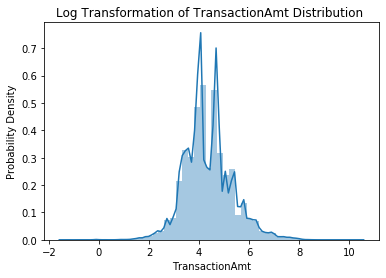

In [18]:
plt.figure()
sns.distplot(df_train_transaction['TransactionAmt'].apply(np.log))
plt.title("Log Transformation of TransactionAmt Distribution ")
plt.ylabel("Probability Density")
plt.show()

In [19]:
df_train = df_train.fillna(-999)
df_test= df_test.fillna(-999)

In [20]:
y_train = df_train['isFraud']
X_train = df_train.drop(columns=['isFraud'])
#y_test = df_test[:1]
#X_test = df_test[]



In [21]:
dicti={}
for i in range(1,10):
    dicti.update({'id-0'+str(i):'id_0'+str(i)})
for i in range(10,39):
    dicti.update({'id-'+str(i):'id_'+str(i)})
df_test=df_test.rename(columns=dicti)
del dicti


In [ ]:
df_test

In [22]:
from sklearn import preprocessing
for f in X_train.columns:
    if X_train[f].dtype=='object' or df_test[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(X_train[f].values) + list(df_test[f].values))
        X_train[f] = lbl.transform(list(X_train[f].values))
        df_test[f] = lbl.transform(list(df_test[f].values))

In [23]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=100,random_state=None)
logisticRegr.fit(X_train,y_train)

/Users/ps/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)